In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys

#sys.path.append('/home/marek/NGIMS-hp/')
sys.path.append('/Users/masl3485/Desktop/NGIMS_homopause/src')
import read_raw as rr

In [53]:
hpdata = pd.read_csv('../MCS/data/processed/maven/homopause/2-daybin_3.csv')

In [75]:
peri = pd.read_csv('../MCS/data/processed/maven/peri/peri_v07r01_20170515.csv')

In [55]:
hpdata[(hpdata['orb_med']>2362)&(hpdata['orb_med']<2373)]

,orb_start,orb_end,orb_med,orb_count,date_start,date_end,date_mid,hp_alt,slope,x_int,r_value,p_value,stderr,CO2_180,CO2_180_count,CO2_hp,N2_hp,Ar_hp,exo_alt
1152,2358,2368,2363.0,11,20151216T095625,20151218T071235,20151217T083430,73.969618,0.021862,-1.394010,0.923402,0.0,0.000225,2.931826e+07,69,7.816242e+11,8.139082e+09,6.511265e+09,153.135407
1153,2359,2369,2364.0,11,20151216T142805,20151218T114408,20151217T130606,71.460318,0.021347,-1.302337,0.918283,0.0,0.000227,2.814482e+07,69,9.023157e+11,8.699760e+09,6.959808e+09,152.270812
1154,2360,2369,2364.5,10,20151216T185941,20151218T114408,20151217T152154,69.438727,0.020783,-1.220023,0.925912,0.0,0.000219,3.070677e+07,63,1.151482e+12,1.033800e+10,8.270397e+09,153.143339
1155,2361,2371,2365.5,10,20151216T233117,20151218T204719,20151217T220918,69.898758,0.020871,-1.235694,0.925266,0.0,0.000221,2.797534e+07,63,1.188374e+12,9.657713e+09,7.726170e+09,152.398960
1156,2362,2372,2366.5,10,20151217T040256,20151219T011924,20151218T024110,68.847054,0.020783,-1.207700,0.918249,0.0,0.000234,2.592045e+07,63,1.152396e+12,9.232247e+09,7.385797e+09,151.810051
1157,2363,2373,2367.5,10,20151217T083430,20151219T055102,20151218T071246,68.416110,0.020532,-1.181565,0.911171,0.0,0.000242,2.535583e+07,63,1.274503e+12,9.019586e+09,7.215668e+09,151.233554
1158,2364,2374,2368.5,10,20151217T130609,20151219T102235,20151218T114422,69.265430,0.020820,-1.218980,0.908419,0.0,0.000250,2.388022e+07,64,1.187261e+12,8.959469e+09,7.167575e+09,151.301106
1159,2365,2375,2370.0,10,20151217T173746,20151219T145415,20151218T161600,69.092779,0.020589,-1.199382,0.909879,0.0,0.000245,2.591935e+07,65,1.235890e+12,8.660656e+09,6.928525e+09,151.345795
1160,2366,2376,2371.5,10,20151217T220920,20151219T192553,20151218T204736,67.834399,0.020378,-1.159164,0.905964,0.0,0.000248,2.698906e+07,65,1.240454e+12,9.600971e+09,7.680777e+09,151.302065
1161,2367,2377,2372.5,10,20151218T024058,20151219T235728,20151219T011913,66.750548,0.019899,-1.105154,0.906829,0.0,0.000241,2.795858e+07,64,1.462076e+12,1.068896e+10,8.551172e+09,151.780779


In [6]:
with open('test.dat','r') as f:
    files = [x.strip() for x in f]
bin_df = rr.combine_files(files,io='I')  # inbound only
bin_df_re = rr.realign(bin_df) # convert sp and abun columns to species-specific abunds
bin_df_re.sort_values('alt',ascending=False,inplace=True) # order by dec altitude

In [7]:
bin_df_re.head()

,t_utc,t_unix,t_sclk_cor,t_tid,tid,orbit,focusmode_CO2,alt,lst,long,...,cps_dt_bkd_N2,abundance_N2,precision_N2,quality_N2,focusmode_He,mass_He,cps_dt_bkd_He,abundance_He,precision_He,quality_He
0,2015-12-17T05:23:29,1.450330e+09,5.036018e+08,4729.284944,18224,2362,csn,509.7896,4.850000,-71.86136,...,NaN,NaN,NaN,TSC:NIV:R,csn,4,0.000000,0.000000,NaN,TSC:NIV:U
1075,2015-12-17T18:58:22,1.450379e+09,5.036507e+08,4732.184949,18230,2365,csn,509.1671,4.791111,88.96156,...,NaN,NaN,NaN,TSC:NIV:R,csn,4,0.000000,0.000000,NaN,TSC:NIV:U
376,2015-12-17T09:55:05,1.450346e+09,5.036181e+08,4731.034947,18226,2363,csn,509.0246,4.831389,-138.22760,...,NaN,NaN,NaN,TSC:NIV:R,csn,4,37.039747,10264.364420,0.164311,TSC:NIV:U
726,2015-12-17T14:26:46,1.450362e+09,5.036344e+08,4732.854947,18228,2364,csn,508.2666,4.815000,155.41490,...,NaN,NaN,NaN,TSC:NIV:R,csn,4,70.399665,20401.614966,0.119183,TSC:NIV:U
1780,2015-12-18T04:01:38,1.450411e+09,5.036833e+08,4736.144949,18234,2367,csn,508.1380,4.755556,-43.76755,...,NaN,NaN,NaN,TSC:NIV:R,csn,4,0.000000,0.000000,NaN,TSC:NIV:U


In [8]:
alts_data = np.linspace(bin_df_re['alt'].min(),190,100)
m_data = 0.020532
b_data = -1.181565
t_data = np.exp(alts_data*m_data + b_data)
na_peri = t_data[0]
all_alts = np.linspace(60,190,100)
all_na = np.exp(all_alts*m_data+b_data)

In [9]:
g = 3.81 
k = 1.38064852e-23 
amu =  1.66e-27
def find_mb(N2Ar,Temp,Alt):
    m = 12.*g*amu/(k*Temp)*1000
    print m
    b = np.log(N2Ar) - (m*Alt)
    return m, b 

In [14]:
alts_mid = np.linspace(100,bin_df_re['alt'].min(),100)
print na_peri,alts_data[0]
m_mid, b_mid = find_mb(na_peri,150,alts_data[0])
print m_mid, b_mid
nad_mid = np.exp(alts_mid*m_mid+b_mid)
na_mid = nad_mid[0]

6.37507118209 147.7674
0.0366471258014
0.0366471258014 -3.56285524035


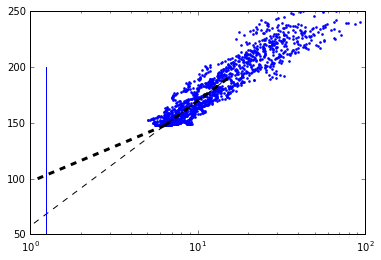

In [15]:
plt.figure()
plt.scatter(bin_df_re['abundance_N2']/bin_df_re['abundance_Ar'],bin_df_re['alt'],lw=0,s=7)
plt.plot(t_data,alts_data,'k--',lw=3)
plt.plot(nad_mid,alts_mid,'k--',lw=3)
plt.plot(all_na,all_alts,'k--')
plt.plot([1.25,1.25],[50,200])
plt.xscale('log')
plt.ylim(50,250)
plt.show()

In [41]:
with open('test2.dat','r') as f:
    files2 = [x.strip() for x in f]
test2_df = rr.combine_files(files2,io='I')  # inbound only
test2 = rr.realign(test2_df) # convert sp and abun columns to species-specific abunds
test2.sort_values('alt',ascending=False,inplace=True) # order by dec altitude

In [42]:
test2.head()

,t_utc,t_unix,t_sclk_cor,t_tid,tid,orbit,focusmode_CO2,alt,lst,long,...,cps_dt_bkd_N2,abundance_N2,precision_N2,quality_N2,focusmode_He,mass_He,cps_dt_bkd_He,abundance_He,precision_He,quality_He
0,2015-07-02T02:15:28,1.435803e+09,4.890753e+08,4698.774464,16436,1468,csn,521.9479,21.49361,57.72808,...,NaN,NaN,NaN,TSC:NIV:R,csn,4,0.000000,0.000000,NaN,TSC:NIV:U
1,2015-07-02T02:15:30,1.435803e+09,4.890753e+08,4700.774464,16436,1468,csn,520.1161,21.50861,57.94596,...,NaN,NaN,NaN,TSC:NIV:R,csn,4,167.521649,49099.739289,0.077262,TSC:NIV:U
2,2015-07-02T02:15:32,1.435803e+09,4.890753e+08,4702.774464,16436,1468,csn,518.2879,21.52389,58.16556,...,NaN,NaN,NaN,TSC:NIV:R,csn,4,167.521649,49082.599968,0.077262,TSC:NIV:U
3,2015-07-02T02:15:34,1.435803e+09,4.890753e+08,4704.774464,16436,1468,csn,516.4633,21.53917,58.38688,...,NaN,NaN,NaN,TSC:NIV:R,csn,4,0.000000,0.000000,NaN,TSC:NIV:U
4,2015-07-02T02:15:36,1.435803e+09,4.890753e+08,4706.774464,16436,1468,csn,514.6423,21.55444,58.60995,...,NaN,NaN,NaN,TSC:NIV:R,csn,4,0.000000,0.000000,NaN,TSC:NIV:U


In [43]:
alts_2 = np.linspace(test2['alt'].min(),190,100)
m_2 = 0.032379
b_2 = -2.675441
na2 = np.exp(alts_2*m_2 + b_2)
na_peri2 = na2[0]
all_na2 = np.exp(all_alts*m_2+b_2)

alts_mid2 = np.linspace(100,test2['alt'].min(),100)
m_mid2, b_mid2 = find_mb(na_peri2,120,alts_2[0])
print m_mid2, b_mid2
nad_mid2 = np.exp(alts_mid2*m_mid2+b_mid2)
na_mid2 = nad_mid2[0]

0.0458089072518
0.0458089072518 -4.65503215976


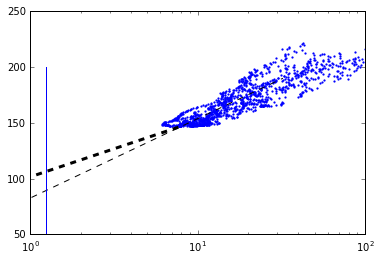

In [44]:
plt.figure()
plt.scatter(test2['abundance_N2']/test2['abundance_Ar'],test2['alt'],lw=0,s=5)
#plt.plot(t_data,alts_data,'k--',lw=3)
plt.plot(nad_mid2,alts_mid2,'k--',lw=3)
plt.plot(all_na2,all_alts,'k--')
plt.plot([1.25,1.25],[50,200])
plt.xscale('log')
plt.ylim(50,250)
plt.xlim(1,100)
plt.show()

In [48]:
with open('test3.dat','r') as f:
    files3 = [x.strip() for x in f]
test3_df = rr.combine_files(files3,io='I')  # inbound only
test3 = rr.realign(test3_df) # convert sp and abun columns to species-specific abunds
test3.sort_values('alt',ascending=False,inplace=True) # order by dec altitude
test3.head()

,t_utc,t_unix,t_sclk_cor,t_tid,tid,orbit,focusmode_CO2,alt,lst,long,...,cps_dt_bkd_N2,abundance_N2,precision_N2,quality_N2,focusmode_He,mass_He,cps_dt_bkd_He,abundance_He,precision_He,quality_He
0,2016-06-04T05:04:10,1.465017e+09,5.182886e+08,4708.404496,20038,3269,csn,492.5355,4.990833,126.31040,...,NaN,NaN,NaN,TSU:NIV:R,csn,4,0.0,0.0,NaN,TSU:NIV:U
1,2016-06-04T05:04:12,1.465017e+09,5.182886e+08,4710.404496,20038,3269,csn,490.6746,4.992778,126.33310,...,NaN,NaN,NaN,TSU:NIV:R,csn,4,0.0,0.0,NaN,TSU:NIV:U
1418,2016-06-04T22:59:40,1.465081e+09,5.183531e+08,4711.464496,20046,3273,csn,488.9114,4.927222,-136.35060,...,NaN,NaN,NaN,TSU:NIV:R,csn,4,0.0,0.0,NaN,TSU:NIV:U
2,2016-06-04T05:04:14,1.465017e+09,5.182886e+08,4712.404496,20038,3269,csn,488.8177,4.995000,126.35580,...,NaN,NaN,NaN,TSU:NIV:R,csn,4,0.0,0.0,NaN,TSU:NIV:U
1051,2016-06-04T18:30:51,1.465065e+09,5.183370e+08,4712.064495,20044,3272,csn,488.6215,4.943333,-70.69289,...,NaN,NaN,NaN,TSU:NIV:R,csn,4,0.0,0.0,NaN,TSU:NIV:U


In [56]:
hpdata[(hpdata['orb_med']>3269)&(hpdata['orb_med']<3279)]

,orb_start,orb_end,orb_med,orb_count,date_start,date_end,date_mid,hp_alt,slope,x_int,r_value,p_value,stderr,CO2_180,CO2_180_count,CO2_hp,N2_hp,Ar_hp,exo_alt
1952,3264,3274,3269.5,10,20160603T051921,20160605T020807,20160604T034344,90.569688,0.035947,-3.032586,0.950715,0.0,0.000308,5.257636e+06,64,1.705673e+12,2.036517e+10,1.629213e+10,149.581908
1953,3265,3275,3270.5,10,20160603T094813,20160605T063659,20160604T081236,89.736739,0.035312,-2.945647,0.939796,0.0,0.000337,5.613319e+06,64,1.583850e+12,2.166833e+10,1.733466e+10,149.674415
1954,3266,3276,3271.5,10,20160603T141708,20160605T110550,20160604T124129,88.532708,0.034547,-2.835435,0.931355,0.0,0.000354,7.258712e+06,64,1.305091e+12,2.175011e+10,1.740009e+10,149.898917
1955,3267,3277,3272.5,10,20160603T184602,20160605T153442,20160604T171022,86.732995,0.033746,-2.703711,0.927510,0.0,0.000355,6.841169e+06,64,1.686148e+12,2.191015e+10,1.752812e+10,149.557300
1956,3269,3279,3274.0,11,20160604T034347,20160606T003226,20160605T020806,88.763034,0.034955,-2.879595,0.937221,0.0,0.000325,5.541538e+06,70,1.702541e+12,2.314551e+10,1.851641e+10,149.707086
1957,3270,3280,3275.0,11,20160604T081238,20160606T050118,20160605T063658,86.990655,0.033901,-2.725949,0.932536,0.0,0.000328,6.957064e+06,70,1.530992e+12,2.173097e+10,1.738477e+10,149.805117
1958,3271,3281,3276.0,11,20160604T124130,20160606T093007,20160605T110548,86.972309,0.033880,-2.723502,0.933721,0.0,0.000325,6.742627e+06,69,1.429423e+12,1.995119e+10,1.596095e+10,149.228346
1959,3272,3282,3277.0,11,20160604T171024,20160606T135857,20160605T153440,84.414223,0.033031,-2.565107,0.926604,0.0,0.000336,6.129778e+06,69,1.917213e+12,2.681006e+10,2.144805e+10,148.651027
1960,3273,3282,3277.5,10,20160604T213914,20160606T135857,20160605T174905,84.369164,0.032736,-2.538747,0.926504,0.0,0.000350,6.543213e+06,63,1.752720e+12,2.617220e+10,2.093776e+10,148.755153
1961,3274,3282,3278.0,9,20160605T020807,20160606T135857,20160605T200332,84.189004,0.032592,-2.520780,0.922197,0.0,0.000378,7.143383e+06,56,1.646245e+12,2.419476e+10,1.935581e+10,148.971814


In [61]:
alts_3 = np.linspace(test3['alt'].min(),190,100)
m_3 = 0.033901
b_3 = -2.725949
na3 = np.exp(alts_3*m_3 + b_3)
na_peri3 = na3[0]
all_na3 = np.exp(all_alts*m_3+b_3)

alts_mid3 = np.linspace(100,test3['alt'].min(),100)
m_mid3, b_mid3 = find_mb(na_peri3,120,alts_3[0])
print m_mid3, b_mid3
nad_mid3 = np.exp(alts_mid3*m_mid3+b_mid3)
na_mid3 = nad_mid3[0]

0.0458089072518
0.0458089072518 -4.482960715


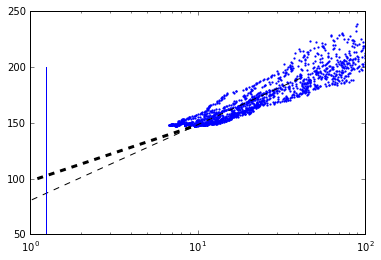

In [62]:
plt.figure()
plt.scatter(test3['abundance_N2']/test3['abundance_Ar'],test3['alt'],lw=0,s=5)
#plt.plot(t_data,alts_data,'k--',lw=3)
plt.plot(nad_mid3,alts_mid3,'k--',lw=3)
plt.plot(all_na3,all_alts,'k--')
plt.plot([1.25,1.25],[50,200])
plt.xscale('log')
plt.ylim(50,250)
plt.xlim(1,100)
plt.show()

In [65]:
with open('test4.dat','r') as f:
    files4 = [x.strip() for x in f]
test4_df = rr.combine_files(files4,io='I')  # inbound only
test4 = rr.realign(test4_df) # convert sp and abun columns to species-specific abunds
test4.sort_values('alt',ascending=False,inplace=True) # order by dec altitude
test4['orbit'].unique()

array([2627, 2628, 2634, 2631, 2633, 2637, 2632, 2635, 2636])

In [66]:
hpdata[(hpdata['orb_med']>=2627)&(hpdata['orb_med']<2637)]

,orb_start,orb_end,orb_med,orb_count,date_start,date_end,date_mid,hp_alt,slope,x_int,r_value,p_value,stderr,CO2_180,CO2_180_count,CO2_hp,N2_hp,Ar_hp,exo_alt
1382,2623,2633,2627.0,9,20160204T061217,20160206T031507,20160205T044342,93.871781,0.022401,-1.879633,0.947119,0.0,0.000202,4.343720e+07,54,1.955401e+11,2.402934e+09,1.922347e+09,159.284273
1383,2624,2634,2628.0,9,20160204T104234,20160206T074526,20160205T091400,94.257034,0.022222,-1.871452,0.944370,0.0,0.000206,4.755313e+07,54,1.586068e+11,2.072688e+09,1.658150e+09,159.264880
1384,2625,2635,2631.0,9,20160204T151252,20160206T121542,20160205T134417,93.107973,0.022010,-1.826163,0.943881,0.0,0.000205,4.792177e+07,54,1.641480e+11,2.142897e+09,1.714318e+09,158.342514
1385,2626,2636,2632.0,9,20160204T194311,20160206T164558,20160205T181434,91.704571,0.021350,-1.734769,0.942278,0.0,0.000202,6.064442e+07,54,1.529592e+11,2.133863e+09,1.707090e+09,161.537596
1386,2627,2637,2633.0,9,20160205T001327,20160206T211615,20160205T224451,92.765960,0.021925,-1.810740,0.940804,0.0,0.000210,5.716324e+07,54,1.717905e+11,2.219877e+09,1.775901e+09,161.299242
1387,2628,2638,2634.0,9,20160205T044343,20160207T014630,20160206T031506,95.096710,0.022729,-1.938336,0.945456,0.0,0.000209,5.706259e+07,54,1.680060e+11,2.246724e+09,1.797379e+09,161.070542
1388,2631,2641,2636.0,11,20160205T181435,20160207T151716,20160206T164555,98.050349,0.023546,-2.085543,0.943831,0.0,0.000199,4.944774e+07,66,1.651626e+11,2.300481e+09,1.840385e+09,159.675326


In [73]:
alts_4 = np.linspace(test4['alt'].min(),190,100)
m_4 = 0.022222
b_4 = -1.871452
na4 = np.exp(alts_4*m_4 + b_4)
na_peri4 = na4[0]
all_na4 = np.exp(all_alts*m_4+b_4)

alts_mid4 = np.linspace(100,test4['alt'].min(),100)
m_mid4, b_mid4 = find_mb(na_peri4,150,alts_4[0])
print m_mid4, b_mid4
nad_mid4 = np.exp(alts_mid4*m_mid4+b_mid4)
na_mid4 = nad_mid4[0]

0.0366471258014
0.0366471258014 -3.9292221608


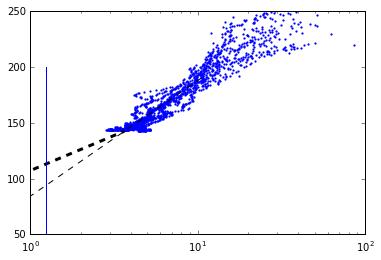

In [74]:
plt.figure()
plt.scatter(test4['abundance_N2']/test4['abundance_Ar'],test4['alt'],lw=0,s=5)
#plt.plot(t_data,alts_data,'k--',lw=3)
plt.plot(nad_mid4,alts_mid4,'k--',lw=3)
plt.plot(all_na4,all_alts,'k--')
plt.plot([1.25,1.25],[50,200])
plt.xscale('log')
plt.ylim(50,250)
plt.xlim(1,100)
plt.show()

In [80]:
with open('test5.dat','r') as f:
    files5 = [x.strip() for x in f]
test5_df = rr.combine_files(files5,io='I')  # inbound only
test5 = rr.realign(test5_df) # convert sp and abun columns to species-specific abunds
test5.sort_values('alt',ascending=False,inplace=True) # order by dec altitude
sorted(test5['orbit'].unique())

[3551, 3552, 3553, 3554, 3555, 3556, 3557, 3558, 3559, 3560, 3561]

In [81]:
hpdata[(hpdata['orb_med']>=3551)&(hpdata['orb_med']<3561)]

,orb_start,orb_end,orb_med,orb_count,date_start,date_end,date_mid,hp_alt,slope,x_int,r_value,p_value,stderr,CO2_180,CO2_180_count,CO2_hp,N2_hp,Ar_hp,exo_alt
2189,3545,3555,3551.0,9,20160725T000059,20160726T200817,20160725T220438,109.129499,0.037336,-3.851266,0.978632,0.0,0.000211,8.053531e+06,42,2.047264e+11,3.570215e+09,2.856172e+09,151.740765
2190,3546,3556,3552.0,9,20160725T042606,20160727T003219,20160726T022912,109.610969,0.037418,-3.878227,0.982020,0.0,0.000190,8.062055e+06,43,1.964723e+11,3.608770e+09,2.887016e+09,152.526275
2191,3547,3557,3553.0,9,20160725T085114,20160727T045610,20160726T065342,109.746295,0.037608,-3.904201,0.983137,0.0,0.000184,8.040035e+06,41,2.004967e+11,3.771170e+09,3.016936e+09,152.111322
2192,3548,3558,3554.0,9,20160725T131620,20160727T091959,20160726T111809,109.309904,0.037151,-3.837813,0.983299,0.0,0.000179,1.040690e+07,40,2.083404e+11,4.083192e+09,3.266553e+09,153.211042
2193,3551,3561,3556.0,11,20160726T023117,20160727T223039,20160727T003058,108.689935,0.036581,-3.752817,0.981713,0.0,0.000165,9.031697e+06,48,2.351013e+11,4.591578e+09,3.673262e+09,151.693263
2194,3552,3562,3557.0,11,20160726T065543,20160728T025357,20160727T045450,108.639236,0.036564,-3.749151,0.978488,0.0,0.000180,8.725305e+06,48,2.559237e+11,4.967904e+09,3.974323e+09,151.003734
2195,3553,3562,3557.5,10,20160726T111959,20160728T025357,20160727T070658,108.166221,0.035852,-3.654884,0.978613,0.0,0.000185,9.509286e+06,43,2.667615e+11,5.246394e+09,4.197115e+09,151.523378
2196,3554,3564,3558.5,10,20160726T154410,20160728T113957,20160727T134203,107.761001,0.035268,-3.577329,0.979958,0.0,0.000176,9.148141e+06,47,3.054653e+11,5.815023e+09,4.652018e+09,151.874278
2197,3555,3565,3559.5,10,20160726T200817,20160728T160243,20160727T180530,107.221863,0.035055,-3.535550,0.981490,0.0,0.000167,9.313612e+06,47,3.297068e+11,6.134357e+09,4.907486e+09,151.656232
2198,3556,3566,3560.5,10,20160727T003219,20160728T202520,20160727T222849,106.178571,0.034656,-3.456633,0.976181,0.0,0.000188,9.147524e+06,45,4.124644e+11,7.534297e+09,6.027438e+09,150.911485


In [101]:
alts_5 = np.linspace(test5['alt'].min(),190,100)
m_5 = 0.037
b_5 = -3.8
na5 = np.exp(alts_5*m_5 + b_5)
na_peri5 = na5[0]
all_na5 = np.exp(all_alts*m_5+b_5)

alts_mid5 = np.linspace(100,test5['alt'].min(),100)
m_mid5, b_mid5 = find_mb(na_peri5,100,alts_5[0])
print m_mid5, b_mid5
nad_mid5 = np.exp(alts_mid5*m_mid5+b_mid5)
na_mid5 = nad_mid5[0]

0.0549706887021
0.0549706887021 -5.94948126394


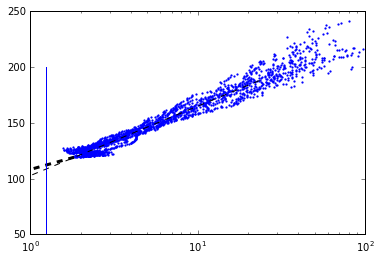

In [102]:
plt.figure()
plt.scatter(test5['abundance_N2']/test5['abundance_Ar'],test5['alt'],lw=0,s=5)
#plt.plot(t_data,alts_data,'k--',lw=3)
plt.plot(nad_mid5,alts_mid5,'k--',lw=3)
plt.plot(all_na5,all_alts,'k--')
plt.plot([1.25,1.25],[50,200])
plt.xscale('log')
plt.ylim(50,250)
plt.xlim(1,100)
plt.show()

In [104]:
with open('test6.dat','r') as f:
    files6 = [x.strip() for x in f]
test6_df = rr.combine_files(files6,io='I')  # inbound only
test6 = rr.realign(test6_df) # convert sp and abun columns to species-specific abunds
test6.sort_values('alt',ascending=False,inplace=True) # order by dec altitude
sorted(test6['orbit'].unique())

[3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430]

In [105]:
hpdata[(hpdata['orb_med']>=3421)&(hpdata['orb_med']<3431)]

,orb_start,orb_end,orb_med,orb_count,date_start,date_end,date_mid,hp_alt,slope,x_int,r_value,p_value,stderr,CO2_180,CO2_180_count,CO2_hp,N2_hp,Ar_hp,exo_alt
2078,3416,3426,3421.5,10,20160701T061316,20160703T022214,20160702T041745,103.660535,0.038376,-3.754925,0.942769,0.0,0.000369,2.148164e+06,51,3.725506e+11,4.928360e+09,3.942688e+09,146.672518
2079,3417,3427,3422.5,10,20160701T103804,20160703T064716,20160702T084240,102.738821,0.037628,-3.642764,0.945686,0.0,0.000352,2.221230e+06,51,4.405527e+11,4.749074e+09,3.799259e+09,146.692382
2080,3418,3428,3423.5,10,20160701T150252,20160703T111217,20160702T130734,102.988984,0.037892,-3.679324,0.943439,0.0,0.000365,2.216567e+06,52,3.949441e+11,4.630339e+09,3.704271e+09,146.374244
2081,3420,3430,3425.0,11,20160701T235229,20160703T200217,20160702T215723,99.952431,0.035512,-3.326377,0.936905,0.0,0.000342,4.881396e+06,59,2.612789e+11,4.251639e+09,3.401311e+09,146.858958
2082,3421,3431,3426.0,11,20160702T041716,20160704T002716,20160703T022216,97.749156,0.034277,-3.127440,0.936946,0.0,0.000328,5.243271e+06,62,2.910997e+11,4.327745e+09,3.462196e+09,146.857864
2083,3422,3432,3427.0,11,20160702T084212,20160704T045215,20160703T064713,98.073809,0.034242,-3.135116,0.937645,0.0,0.000325,5.397523e+06,62,2.596083e+11,3.818509e+09,3.054807e+09,146.995855
2084,3423,3433,3428.0,11,20160702T130711,20160704T091717,20160703T111214,96.528245,0.033673,-3.027284,0.928988,0.0,0.000346,5.301965e+06,62,2.089072e+11,3.235400e+09,2.588320e+09,146.367275
2085,3424,3434,3429.0,11,20160702T173214,20160704T134214,20160703T153714,98.693795,0.034243,-3.156464,0.948480,0.0,0.000296,4.885781e+06,68,2.183551e+11,3.017153e+09,2.413722e+09,146.843753
2086,3425,3435,3430.0,11,20160702T215715,20160704T180717,20160703T200216,98.115491,0.033887,-3.101730,0.949347,0.0,0.000289,5.044849e+06,69,2.326192e+11,3.006344e+09,2.405075e+09,146.740254


In [117]:
alts_6 = np.linspace(test6['alt'].min(),190,100)
m_6 = 0.034277
b_6 = -3.3
na6 = np.exp(alts_6*m_6 + b_6)
na_peri6 = na6[0]
all_na6 = np.exp(all_alts*m_6+b_6)

alts_mid6 = np.linspace(100,test6['alt'].min(),100)
m_mid6, b_mid6 = find_mb(na_peri6,100,alts_6[0])
print m_mid6, b_mid6
nad_mid6 = np.exp(alts_mid6*m_mid6+b_mid6)
na_mid6 = nad_mid6[0]

0.0549706887021
0.0549706887021 -6.21787632681


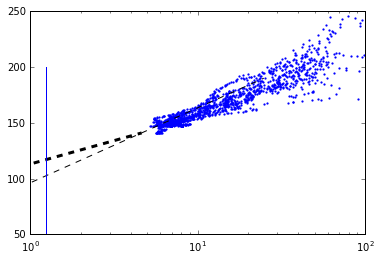

In [118]:
plt.figure()
plt.scatter(test6['abundance_N2']/test6['abundance_Ar'],test6['alt'],lw=0,s=5)
#plt.plot(t_data,alts_data,'k--',lw=3)
plt.plot(nad_mid6,alts_mid6,'k--',lw=3)
plt.plot(all_na6,all_alts,'k--')
plt.plot([1.25,1.25],[50,200])
plt.xscale('log')
plt.ylim(50,250)
plt.xlim(1,100)
plt.show()

In [144]:
with open('test7.dat','r') as f:
    files7 = [x.strip() for x in f]
test7_df = rr.combine_files(files7,io='I')  # inbound only
test7 = rr.realign(test7_df) # convert sp and abun columns to species-specific abunds
test7.sort_values('alt',ascending=False,inplace=True) # order by dec altitude
sorted(test7['orbit'].unique())

[3306, 3307, 3308, 3311, 3312, 3313, 3314, 3315, 3316]

In [157]:
alts_7 = np.linspace(test7['alt'].min(),190,100)
m_7 = 0.0307
b_7 = -2.368
na7 = np.exp(alts_7*m_7 + b_7)
na_peri7 = na7[0]
all_na7 = np.exp(all_alts*m_7+b_7)

print test7['alt'].min()
alts_mid7 = np.linspace(100,test7['alt'].min(),100)
m_mid7, b_mid7 = find_mb(na_peri7,100,alts_7[0])
print m_mid7, b_mid7
nad_mid7 = np.exp(alts_mid7*m_mid7+b_mid7)
na_mid7 = nad_mid7[0]

116.6151
0.0549706887021
0.0549706887021 -5.19832879007


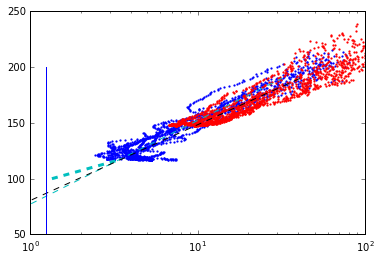

In [169]:
plt.figure()
plt.scatter(test7['abundance_N2']/test7['abundance_Ar'],test7['alt'],lw=0,s=5)
plt.scatter(test3['abundance_N2']/test3['abundance_Ar'],test3['alt'],lw=0,s=5,c='r')
#plt.plot(t_data,alts_data,'k--',lw=3)
plt.plot(nad_mid7,alts_mid7,'c--',lw=3)
plt.plot(all_na7,all_alts,'c--')
plt.plot(all_na3,all_alts,'k--')
plt.plot([1.25,1.25],[50,200])
plt.xscale('log')
plt.ylim(50,250)
plt.xlim(1,100)
plt.show()

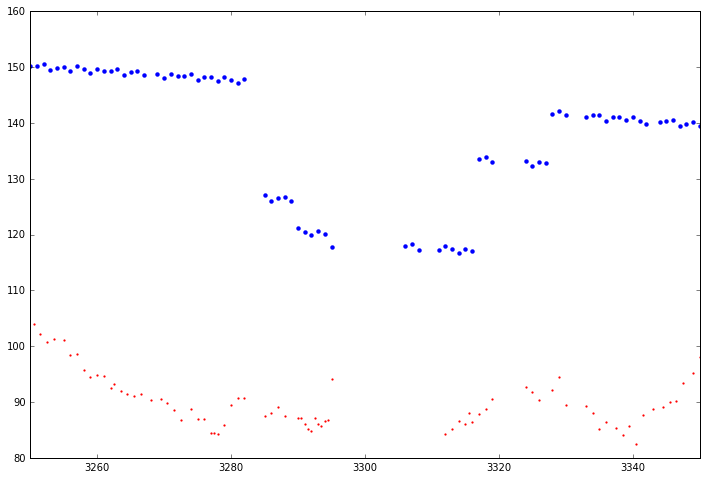

In [171]:
plt.figure(figsize=(12,8))
plt.scatter(hpdata['orb_med'],hpdata['hp_alt'],s=5,lw=0,c='r')
plt.scatter(peri['orbit'],peri['alt'],lw=0)
plt.ylim(80,160)
plt.xlim(3250,3350)
plt.show()

In [142]:
hpdata[(hpdata['hp_alt']<90) & (hpdata['orb_med']>3000) ]

,orb_start,orb_end,orb_med,orb_count,date_start,date_end,date_mid,hp_alt,slope,x_int,r_value,p_value,stderr,CO2_180,CO2_180_count,CO2_hp,N2_hp,Ar_hp,exo_alt
1953,3265,3275,3270.5,10,20160603T094813,20160605T063659,20160604T081236,89.736739,0.035312,-2.945647,0.939796,0.000000e+00,0.000337,5.613319e+06,64,1.583850e+12,2.166833e+10,1.733466e+10,149.674415
1954,3266,3276,3271.5,10,20160603T141708,20160605T110550,20160604T124129,88.532708,0.034547,-2.835435,0.931355,0.000000e+00,0.000354,7.258712e+06,64,1.305091e+12,2.175011e+10,1.740009e+10,149.898917
1955,3267,3277,3272.5,10,20160603T184602,20160605T153442,20160604T171022,86.732995,0.033746,-2.703711,0.927510,0.000000e+00,0.000355,6.841169e+06,64,1.686148e+12,2.191015e+10,1.752812e+10,149.557300
1956,3269,3279,3274.0,11,20160604T034347,20160606T003226,20160605T020806,88.763034,0.034955,-2.879595,0.937221,0.000000e+00,0.000325,5.541538e+06,70,1.702541e+12,2.314551e+10,1.851641e+10,149.707086
1957,3270,3280,3275.0,11,20160604T081238,20160606T050118,20160605T063658,86.990655,0.033901,-2.725949,0.932536,0.000000e+00,0.000328,6.957064e+06,70,1.530992e+12,2.173097e+10,1.738477e+10,149.805117
1958,3271,3281,3276.0,11,20160604T124130,20160606T093007,20160605T110548,86.972309,0.033880,-2.723502,0.933721,0.000000e+00,0.000325,6.742627e+06,69,1.429423e+12,1.995119e+10,1.596095e+10,149.228346
1959,3272,3282,3277.0,11,20160604T171024,20160606T135857,20160605T153440,84.414223,0.033031,-2.565107,0.926604,0.000000e+00,0.000336,6.129778e+06,69,1.917213e+12,2.681006e+10,2.144805e+10,148.651027
1960,3273,3282,3277.5,10,20160604T213914,20160606T135857,20160605T174905,84.369164,0.032736,-2.538747,0.926504,0.000000e+00,0.000350,6.543213e+06,63,1.752720e+12,2.617220e+10,2.093776e+10,148.755153
1961,3274,3282,3278.0,9,20160605T020807,20160606T135857,20160605T200332,84.189004,0.032592,-2.520780,0.922197,0.000000e+00,0.000378,7.143383e+06,56,1.646245e+12,2.419476e+10,1.935581e+10,148.971814
1962,3275,3285,3279.0,9,20160605T063659,20160607T032511,20160606T050105,85.862820,0.032488,-2.566356,0.942328,0.000000e+00,0.000315,8.441640e+06,54,2.176888e+12,2.618594e+10,2.094875e+10,149.409025


In [143]:
peri[(peri['alt']<130) & (peri['orbit']>3000)]

,alt,lat,long,lst,sza,t_utc,orbit,peri_index,Ls
1971,127.1413,36.041790,166.196900,5.612500,90.87800,2016-06-07T04:56:56,3285,330,164.886375
1972,126.0371,35.938580,100.673500,5.594722,91.13174,2016-06-07T09:25:06,3286,354,164.986490
1973,126.6159,35.804850,35.180460,5.577500,91.38389,2016-06-07T13:53:11,3287,349,165.086606
1974,126.6955,35.694240,-30.326100,5.559167,91.64632,2016-06-07T18:21:16,3288,356,165.186754
1975,125.9763,35.620090,-95.803390,5.541667,91.89337,2016-06-07T22:49:16,3289,349,165.286904
1976,121.1324,35.388330,-161.280800,5.521389,92.19946,2016-06-08T03:17:06,3290,348,165.387023
1977,120.5021,35.300210,133.298400,5.503889,92.44963,2016-06-08T07:44:53,3291,347,165.487156
1978,119.9335,35.140620,67.892680,5.484722,92.73204,2016-06-08T12:12:29,3292,353,165.587254
1979,120.6332,34.994050,2.528615,5.467222,92.99273,2016-06-08T16:40:02,3293,354,165.687364
1980,120.1565,34.786990,-62.890770,5.445000,93.32149,2016-06-08T21:07:31,3294,361,165.787482
